In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [148]:
x, y = sklearn.datasets.make_moons(200, noise = 0.15)

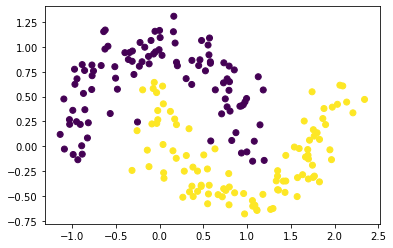

In [149]:
plt.scatter(x[:,0],x[:,1], c = y)

In [150]:
x.shape, y.shape


((200, 2), (200,))

In [151]:
input_neurons = 2
output_neurons = 2
samples= x.shape[0]
learning_rate = 0.001
lambda_reg = 0.1

In [152]:
# model_dict = {'w1':w1, 'b1':b1, 'w2':w2,'b2':b2}

In [153]:
def retrieve(model_dict):
    w1 = model_dict['w1']
    b1 = model_dict['b1']
    w2 = model_dict['w2']
    b2 = model_dict['b2']
    return w1,b1,w2,b2


In [154]:
def forward(x, model_dict):
    w1,b1,w2,b2 = retrieve(model_dict)
    z1 = x.dot(w1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(w2) + b2
    a2 = np.tanh(z2)
    exp_scores = np.exp(a2)
    softmax = exp_scores/np.sum(exp_scores, axis = 1, keepdims = True)
    return z1, a1, softmax
    

In [155]:
def loss(softmax, y, model_dict):
    W1, b1, W2, b2 = retrieve(model_dict)
    m = np.zeros(200)
    for i,correct_index in enumerate(y):
        predicted = softmax[i][correct_index]
        m[i] = predicted
    log_prob = -np.log(m)
    loss = np.sum(log_prob)
    reg_loss = lambda_reg / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    loss+= reg_loss
    return float(loss / y.shape[0])

In [156]:
def predict(x, model_dict):
    w1,b1,w2,b2 = retrieve(model_dict)
    z1 = x.dot(w1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(w2) + b2
    a2 = np.tanh(z2)
    exp_scores = np.exp(a2)
    softmax = exp_scores/np.sum(exp_scores, axis = 1, keepdims = True)
    return np.argmax(softmax, axis = 1)


In [157]:
def backpropogation(x, y, model_dict, epochs):
    for i in range(epochs):
        w1,b1,w2,b2 = retrieve(model_dict)
        z1, a1, probs = forward(x, model_dict)
        delta3 = np.copy(probs)
        delta3[range(x.shape[0]), y] -=1
        dw2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis = 0, keepdims = True)
        delta2 = delta3.dot(w2.T)*(1-np.power(np.tanh(z1),2))
        dw1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis = 0)
        # Add regularization terms
        
        dw2 += lambda_reg*np.sum(w2)
        dw1 += lambda_reg*np.sum(w1)
        
        w1 += -learning_rate*dw1
        b1 += -learning_rate*db1
        w2 += -learning_rate*dw2
        b2 += -learning_rate*db2
        
        model_dict = {'w1': w1, 'b1':b1, 'w2':w2, 'b2':b2}
        
        if i%50==0:
            print(f"Loss at epoch{i} is {loss(probs, y, model_dict):.3f} Accuracy: {(np.argmax(probs,axis= 1) == y).mean()}")
    return model_dict
        
        

In [158]:
def init_network(input_dim, hidden_dim, output_dim):
    model = {}
    w1 = np.random.randn(input_dim, hidden_dim)/np.sqrt(input_dim)
    b1 = np.zeros((1, hidden_dim))
    w2 = np.random.randn(hidden_dim, output_dim)/ np.sqrt(input_dim)
    b2 = np.zeros((1, output_dim))
    model['w1'] = w1
    model['b1'] = b1
    model['w2'] = w2
    model['b2'] = b2
    return model

In [159]:
model_dict = init_network(input_dim = input_neurons, hidden_dim = 3, output_dim = output_neurons)
model = backpropogation(x,y,model_dict, 1500)

Loss at epoch0 is 0.474 Accuracy: 0.815
Loss at epoch50 is 0.361 Accuracy: 0.885
Loss at epoch100 is 0.363 Accuracy: 0.885
Loss at epoch150 is 0.367 Accuracy: 0.88
Loss at epoch200 is 0.371 Accuracy: 0.87
Loss at epoch250 is 0.375 Accuracy: 0.87
Loss at epoch300 is 0.379 Accuracy: 0.865
Loss at epoch350 is 0.383 Accuracy: 0.865
Loss at epoch400 is 0.387 Accuracy: 0.865
Loss at epoch450 is 0.390 Accuracy: 0.865
Loss at epoch500 is 0.393 Accuracy: 0.865
Loss at epoch550 is 0.395 Accuracy: 0.865
Loss at epoch600 is 0.397 Accuracy: 0.875
Loss at epoch650 is 0.400 Accuracy: 0.88
Loss at epoch700 is 0.404 Accuracy: 0.88
Loss at epoch750 is 0.410 Accuracy: 0.88
Loss at epoch800 is 0.416 Accuracy: 0.88
Loss at epoch850 is 0.424 Accuracy: 0.885
Loss at epoch900 is 0.431 Accuracy: 0.885
Loss at epoch950 is 0.440 Accuracy: 0.885
Loss at epoch1000 is 0.449 Accuracy: 0.885
Loss at epoch1050 is 0.458 Accuracy: 0.88
Loss at epoch1100 is 0.469 Accuracy: 0.88
Loss at epoch1150 is 0.480 Accuracy: 0.88
L